## Кластерный анализ регионов ##

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 85


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# загружаем датасет, регион переводим сразу в индекс

work_clust = pd.read_csv('C:/00_Projects/Lenin/Datasets/04_work_data/work_weight.csv', index_col='region')

In [4]:
work_clust.head()

,datawrapperName,city_m5sts,city_m10sts,lenin_street_cm5st,lenin_street_cm10st,cities_1_lsts_cm5s,cities_1_lsts_cm10s,monument_OKN_cm5sts,monument_OKN_cm10sts,monument_lst_cm5sts,monument_lst_cm10sts,lenin_street_weight_5,lenin_street_weight_10,cities_1_lsts_weight_5,cities_1_lsts_weight_10,monument_OKN_weight_5,monument_OKN_weight_10,monument_lst_weight_5,monument_lst_weight_10
region,,,,,,,,,,,,,,,,,,,
Алтайский край,Алтайский край,897,482,213,161,204,152,2.0,2.0,68,65,0.2375,0.3340,0.2274,0.3154,0.0022,0.0041,0.0758,0.1349
Амурская область,Амурская область,340,159,57,46,53,42,20.0,19.0,22,20,0.1676,0.2893,0.1559,0.2642,0.0588,0.1195,0.0647,0.1258
Архангельская область,Архангельская область,353,169,39,37,33,31,0.0,0.0,31,30,0.1105,0.2189,0.0935,0.1834,0.0000,0.0000,0.0878,0.1775
Астраханская область,Астраханская область,228,170,106,88,93,77,1.0,1.0,21,19,0.4649,0.5176,0.4079,0.4529,0.0044,0.0059,0.0921,0.1118
Белгородская область,Белгородская область,553,247,73,55,67,49,11.0,9.0,56,47,0.1320,0.2227,0.1212,0.1984,0.0199,0.0364,0.1013,0.1903


In [5]:
# Исключаем Чечню и Ингушетию

work_clust = work_clust[~(
    (work_clust.index == 'Чечня')
    | (work_clust.index == 'Ингушетия')
)]

In [6]:
work_clust.columns

Index(['datawrapperName', 'city_m5sts', 'city_m10sts', 'lenin_street_cm5st',
       'lenin_street_cm10st', 'cities_1_lsts_cm5s', 'cities_1_lsts_cm10s',
       'monument_OKN_cm5sts', 'monument_OKN_cm10sts', 'monument_lst_cm5sts',
       'monument_lst_cm10sts', 'lenin_street_weight_5',
       'lenin_street_weight_10', 'cities_1_lsts_weight_5',
       'cities_1_lsts_weight_10', 'monument_OKN_weight_5',
       'monument_OKN_weight_10', 'monument_lst_weight_5',
       'monument_lst_weight_10'],
      dtype='object')

In [7]:
# отбираем нужные столбцы для анализа

need_columns = [
    'lenin_street_weight_10',
    'monument_OKN_weight_10',
    'monument_lst_weight_10']

### Иерархический кластерный анализ ###

In [8]:
# Нормализуем данные

data_normed = preprocessing.MinMaxScaler().fit_transform(work_clust[need_columns].values)

In [9]:
data_normed[:3]

array([[0.37076697, 0.01024232, 0.21853596],
       [0.31093562, 0.29852611, 0.19905822],
       [0.21670459, 0.        , 0.30971747]])

In [10]:
# Вычисляем расстояния между данными (строками массива data_for_clust)
# по умолчанию евклидово расстояние

data_dist = pdist(data_normed, 'euclidean')

In [11]:
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров


link = linkage(data_dist, method='ward')

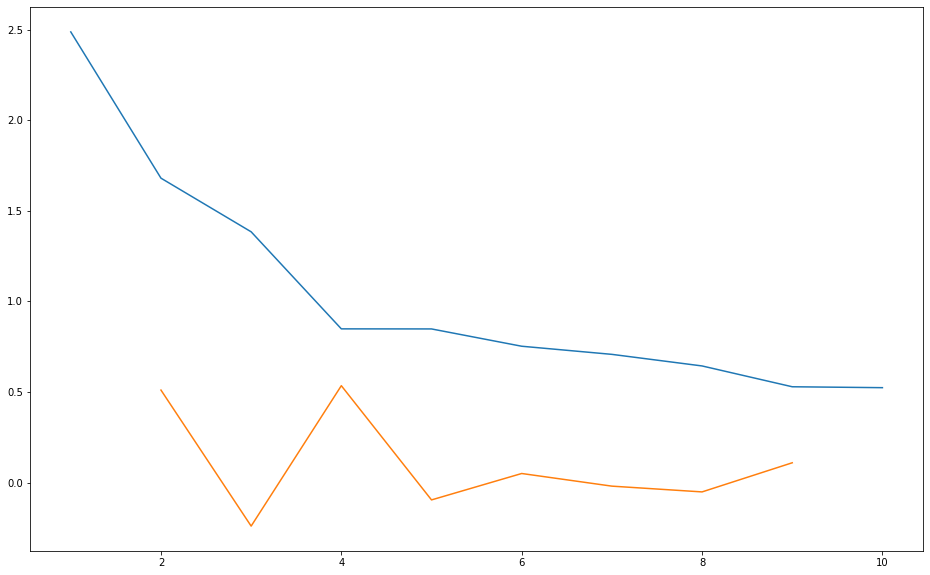

Рекомендованное количество кластеров: 4


In [12]:
plt.rcParams['figure.figsize']=(16, 10)

last = link[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

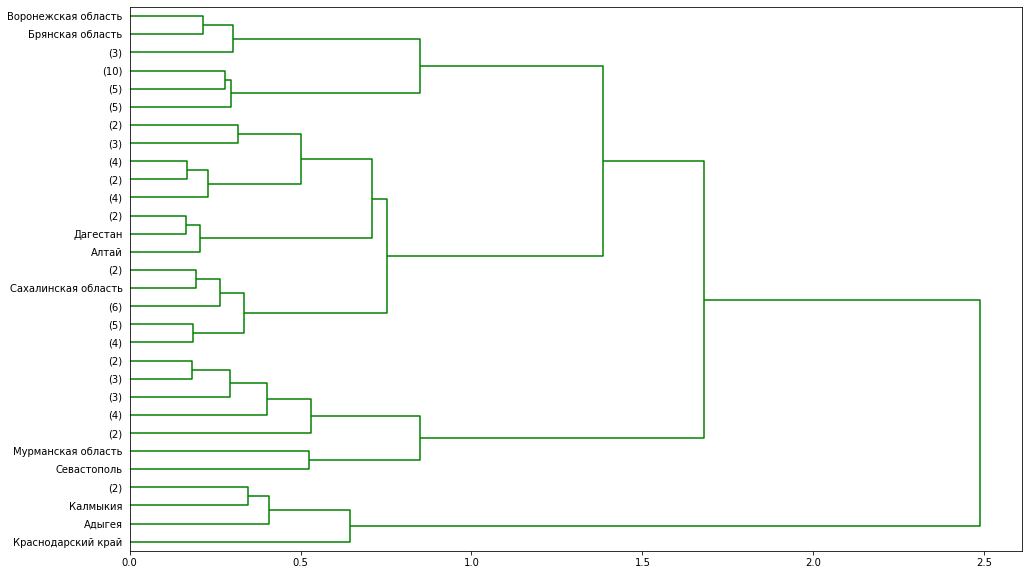

In [13]:
# строим дендрограмму 

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels = work_clust.index.tolist(),
                
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode = 'lastp',
                
                # повернуть подписи вертикально
                color_threshold = 5,
                orientation = 'right',
                leaf_rotation=0.)

In [14]:
# Задаем количество кластеров

n_clusts = 6

In [15]:
# иерархическая кластеризация

clusters = fcluster(link, n_clusts, criterion='maxclust')

clusters

array([5, 4, 4, 5, 4, 6, 4, 5, 4, 6, 4, 3, 2, 4, 4, 3, 5, 3, 4, 5, 3, 4,
       4, 4, 3, 1, 5, 5, 3, 4, 5, 3, 4, 2, 4, 3, 4, 5, 3, 4, 4, 5, 5, 5,
       4, 1, 4, 4, 5, 4, 1, 4, 4, 3, 4, 1, 4, 6, 5, 4, 5, 3, 4, 4, 3, 4,
       6, 5, 1, 4, 3, 4, 4, 4, 4, 5, 4, 5, 5, 6, 3, 5, 4], dtype=int32)

In [16]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: lenin_street_weight_10
1: monument_OKN_weight_10
2: monument_lst_weight_10


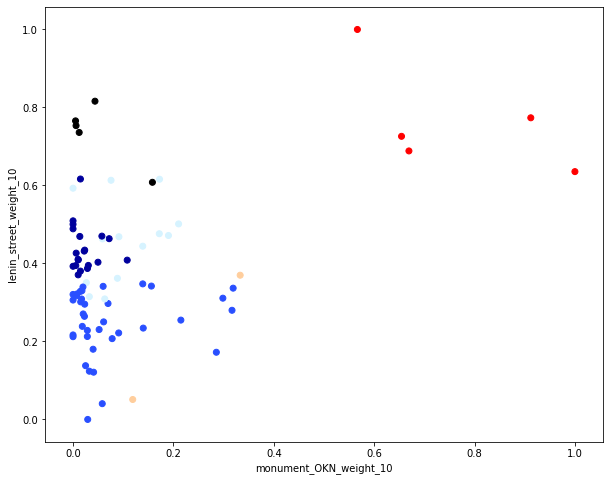

In [17]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов

x = 1
y = 0

plt.figure(figsize=(10, 8))

plt.scatter(data_normed[:,x], data_normed[:,y], c=clusters, cmap='flag')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [18]:
# добавляем номер кластера

work_clust['cluster_hierarchy'] = clusters

In [19]:
# группируем

res_hierarchy = work_clust.groupby('cluster_hierarchy')[need_columns].mean()

res_hierarchy['Объектов в кластере'] = work_clust.groupby('cluster_hierarchy').size().values

In [20]:
# средние цифры по кластерам и количество объектов

res_hierarchy

,lenin_street_weight_10,monument_OKN_weight_10,monument_lst_weight_10,Объектов в кластере
cluster_hierarchy,,,,
1,0.628320,0.304420,0.216820,5
2,0.214250,0.090450,0.416650,2
3,0.401343,0.038136,0.250971,14
4,0.243622,0.029724,0.127616,37
5,0.384305,0.009550,0.113025,20
6,0.606740,0.018020,0.127200,5


In [42]:
# состав кластеров

work_clust[work_clust['cluster_hierarchy'] == 5][need_columns]

,lenin_street_weight_10,monument_OKN_weight_10,monument_lst_weight_10
region,,,
Алтайский край,0.3340,0.0041,0.1349
Астраханская область,0.5176,0.0059,0.1118
Волгоградская область,0.3518,0.0022,0.1305
Иркутская область,0.3756,0.0025,0.0697
Калужская область,0.3412,0.0059,0.1647
Красноярский край,0.3521,0.0122,0.0954
Курганская область,0.3814,0.0093,0.0977
Липецкая область,0.4308,0.0000,0.1436
Новосибирская область,0.3636,0.0040,0.1146


### K-means ###

In [22]:
# строим кластеризаци методом KMeans

km = KMeans(n_clusters=n_clusts).fit(data_normed)

In [23]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1

km.labels_ +1

array([5, 3, 3, 4, 1, 4, 3, 5, 3, 4, 3, 6, 1, 3, 3, 1, 5, 1, 3, 5, 6, 3,
       3, 5, 1, 2, 5, 5, 1, 3, 5, 4, 3, 6, 5, 1, 3, 5, 1, 5, 1, 5, 5, 5,
       1, 2, 3, 5, 5, 3, 2, 5, 3, 1, 3, 2, 3, 4, 5, 3, 5, 1, 1, 1, 1, 1,
       4, 5, 2, 1, 1, 5, 1, 5, 3, 5, 3, 5, 5, 4, 1, 5, 1])

In [24]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: lenin_street_weight_10
1: monument_OKN_weight_10
2: monument_lst_weight_10


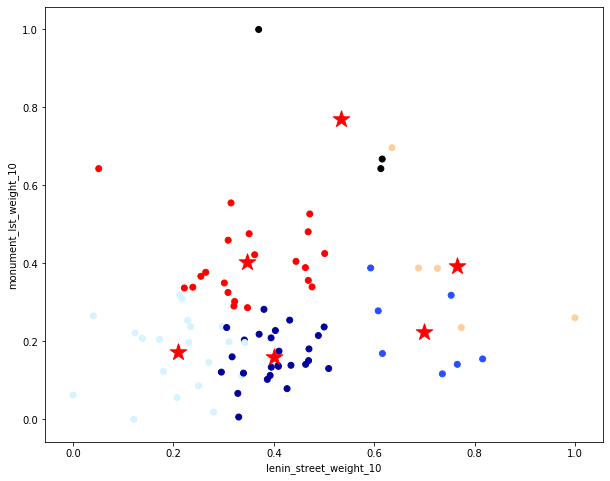

In [25]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов
# звездочки центры кластеров

x = 0
y = 2

centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(data_normed[:,x], data_normed[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [26]:
# к оригинальным данным добавляем номера кластеров

work_clust['cluster_KMeans'] = km.labels_+1

In [27]:
# группируем

res_KMeans = work_clust.groupby('cluster_KMeans')[need_columns].mean()
res_KMeans['объектов в KM'] = work_clust.groupby('cluster_KMeans').size().values

In [28]:
# средние цифры по кластерам и количество объектов

res_KMeans

,lenin_street_weight_10,monument_OKN_weight_10,monument_lst_weight_10,объектов в KM
cluster_KMeans,,,,
1,0.315333,0.032990,0.220952,21
2,0.628320,0.304420,0.216820,5
3,0.213700,0.039638,0.113338,21
4,0.578757,0.013714,0.137443,7
5,0.355938,0.009304,0.107881,26
6,0.455233,0.077533,0.392700,3


In [29]:
# состав кластеров

work_clust[work_clust['cluster_KMeans'] == 1][need_columns]

,lenin_street_weight_10,monument_OKN_weight_10,monument_lst_weight_10
region,,,
Белгородская область,0.2227,0.0364,0.1903
Севастополь,0.0952,0.0476,0.3333
Ивановская область,0.3274,0.0354,0.2301
Кабардино-Балкария,0.4316,0.0842,0.2316
Костромская область,0.3191,0.0106,0.2553
Курская область,0.2922,0.0130,0.2922
Нижегородская область,0.4072,0.0055,0.1994
Омская область,0.4094,0.0761,0.2790
Орловская область,0.2877,0.0068,0.1849


In [30]:
# возвращаем города в столбец city

region_clust_res = (work_clust
                   .rename_axis('index').reset_index()
                   .rename(columns={'index': 'region'})
                  )

In [31]:
region_clust_res.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/region_hierarchy_clustering.xlsx',
    encoding='utf-8', index=False)

In [32]:
#res_hierarchy.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/res_region_hierarchy.xlsx',
#    encoding='utf-8', index=False)